**Table of contents**<a id='toc0_'></a>    
- [Research And Goal:](#toc1_1_1_)    
      - [The national income or product identity vs Interest Rate](#toc1_1_1_1_)    
    - [dataset merge function](#toc1_1_2_)    
    - [Combinining Dataset](#toc1_1_3_)    
  - [cleaning up dateset](#toc1_2_)    
    - [Sort and inverse DataFrame](#toc1_2_1_)    
    - [Plot values](#toc1_2_2_)    
    - [Drop index/periodDateUTC value](#toc1_2_3_)    
    - [check the correlation between features and unemployment](#toc1_2_4_)    
    - [check for correlation between all features](#toc1_2_5_)    
      - [find most correlted feature](#toc1_2_5_1_)    
      - [Variance Inflation Factor (VIF)](#toc1_2_5_2_)    
    - [Feature Selection](#toc1_2_6_)    
      - [Combine Feature which are highly correlated with each other from above figure](#toc1_2_6_1_)    
    - [Spliting data](#toc1_2_7_)    
    - [Linear Regression](#toc1_2_8_)    
    - [Multivariate Normality and Homoscedasticity](#toc1_2_9_)    
    - [r2 score and mean squared error](#toc1_2_10_)    
    - [Linear Regression - Univeriant](#toc1_2_11_)    
    - [SVR (Support Vector Regression)](#toc1_2_12_)    
    - [Random Forest Regression:](#toc1_2_13_)    
    - [Confusion Matrix](#toc1_2_14_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[Research And Goal:](#toc0_)

#### <a id='toc1_1_1_1_'></a>[The national income or product identity vs Interest Rate](#toc0_)

The two most frequently cited indexes that calculate the inflation rate in the U.S. are the Consumer Price Index (CPI) and the Personal Consumption Expenditures Price Index (PCE). These two measures take different approaches to measuring and calculating inflation.

The national income or product identity describes the way in which the gross domestic product (GDP) is measured, as the sum of expenditures in various broad spending categories.
</br>

<b>what is an open economy ?</b></br>
An open economy refers to an economy where people and businesses can freely trade in goods and services with other countries. 
</br>



<b>Total Manufacturing Cost – What is it and How to Calculate it?</b> </br>
Total manufacturing cost is an essential metric for understanding the profitability of a business. It can be used to adjust the selling price of your products, identify and cut expenses, and calculate other key metrics like the Cost of Goods Manufactured.</br>

<b><i>
Total Manufacturing Cost = Direct Materials + Direct Labor + Manufacturing Overhead
</i></b>

<b>All Employees, Total Nonfarm: </b> This data provides insights into the overall employment situation. A strong increase in total nonfarm employment could indicate a growing economy, potentially leading to increased borrowing and spending. If the economy is overheating, central banks might respond by raising interest rates to prevent excessive inflation.

Consumer Price Index (CPI) - All Items and Urban Consumers: CPI measures inflation and rising prices. Higher inflation might lead central banks to raise interest rates to control inflationary pressures. Conversely, if CPI is low, central banks might lower rates to stimulate spending and investment.

Labor Force Participation Rate - Male: Changes in labor force participation can impact the overall employment rate and potential economic growth. A declining participation rate might signal structural issues in the labor market, affecting interest rate decisions.

Personal Consumption Expenditures (PCE): PCE is a measure of consumer spending. Strong consumer spending can stimulate economic growth, potentially leading to higher interest rates if the economy approaches full capacity.

Personal Income, Personal Interest Payments, Personal Saving Rate: These indicators can collectively provide insights into household financial health. High personal interest payments relative to income and savings might indicate a potential strain on households, affecting their ability to borrow and spend, which can influence interest rate decisions.

Population and Working Age Population: Demographic changes, such as an aging population or shifts in the working-age population, can impact overall economic growth potential. These changes might influence interest rate decisions, especially if they affect long-term growth prospects.

Producer Price Index (PPI) - Total Manufacturing Industries and PPI by Commodity - All Commodities: These indicators measure changes in producer prices. Rising producer prices can lead to higher costs for businesses, potentially affecting profit margins and leading to interest rate decisions.

Unemployment Rate: A high unemployment rate might prompt central banks to lower interest rates to stimulate economic activity and job creation. Conversely, a very low unemployment rate might lead to higher interest rates to prevent overheating.

University of Michigan - Inflation Expectation: Market expectations of future inflation can influence interest rates. If inflation expectations are rising, central banks might respond by raising rates to control inflation.

Personal Interest Payments: High levels of personal interest payments might lead to reduced disposable income and consumer spending, affecting overall economic growth and interest rate decisions.

DataSource For Features: <a href ="https://fred.stlouisfed.org">Federal Reserve Bank of St. Louis, One Federal Reserve Bank Plaza, St. Louis</a>


In [67]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

from collections import Counter
from sklearn.metrics import mean_squared_error, mean_absolute_error

### <a id='toc1_1_2_'></a>[dataset merge function](#toc0_)

In [68]:
def combinedDF(main_df, df, name):

    #rename values of new data
    df.columns.values[1] = name

    if 'DATE' not in main_df.columns: 
        print("Date Doesn't exist.")
        return df.copy()

    # Convert to datetime
    main_df['DATE'] = pd.to_datetime(main_df['DATE'], utc=True)
    df['DATE'] = pd.to_datetime(df['DATE'], utc=True)

    # Calculate time-based features
    main_df['year'] = main_df['DATE'].dt.year
    main_df['month'] = main_df['DATE'].dt.month
    df['year'] = df['DATE'].dt.year
    df['month'] = df['DATE'].dt.month

    # Merge the two dataframes
    merged_df = main_df.merge(df, on=['year', 'month'], how='inner')

    # Assign the 'periodDateUtc_y' values to 'periodDateUtc' column
    merged_df['DATE'] = merged_df['DATE_y']

    # Drop unnecessary columns
    merged_df.drop(columns=['DATE_x', 'DATE_y', 'year', 'month'], inplace=True)

    merged_df.sort_values(by='DATE', inplace=True)
    # Reset the index if needed
    merged_df.reset_index(drop=True, inplace=True)
    
    return merged_df

### <a id='toc1_1_3_'></a>[Combinining Dataset](#toc0_)

In [69]:
# Folder containing CSV files
folder_path = './new_data'

# Get a list of CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create a dictionary to store DataFrames
dataframes_dict = {}

# Read each CSV file and store it in the dictionary with the filename as key
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    dataframes_dict[csv_file] = df

data = pd.DataFrame();
# Print the keys (file names) and the corresponding DataFrames
for filename, df in dataframes_dict.items():
    print(f"File: {filename}")
    data = combinedDF(data,df,filename.replace('.csv', ''))
    
data.head(20)

File: All Employees, Total Nonfarm.csv
Date Doesn't exist.
File: Consumer Price Index - All Items.csv
File: Consumer Price Index - Urban Consumers.csv
File: Federal Funds Effective Rate - Interest Rate.csv
File: Labor force participation rate - Male.csv
File: Personal Consumption Expenditures.csv
File: Personal Income.csv
File: Personal interest payments.csv
File: Personal Saving Rate.csv
File: Population.csv
File: Producer Price Index - Total Manufacturing Industries.csv
File: Producer Price Index by Commodity - All Commodities.csv
File: Unemployment Rate.csv
File: University of Michigan - Inflation Expectation.csv
File: Working Age Population.csv


,"All Employees, Total Nonfarm",Consumer Price Index - All Items,Consumer Price Index - Urban Consumers,Federal Funds Effective Rate - Interest Rate,Labor force participation rate - Male,Personal Consumption Expenditures,Personal Income,Personal interest payments,Personal Saving Rate,Population,Producer Price Index - Total Manufacturing Industries,Producer Price Index by Commodity - All Commodities,Unemployment Rate,University of Michigan - Inflation Expectation,Working Age Population,DATE
0,96107,44.427193,105.5,8.38,94.0,2582.6,3420.7,80.6,11.2,237392.0,100.0,103.5,7.3,3.3,1.507188e+08,1984-12-01 00:00:00+00:00
1,96372,44.511575,105.7,8.35,94.0,2618.8,3433.9,84.1,10.3,237535.0,.,103.4,7.3,2.9,1.505133e+08,1985-01-01 00:00:00+00:00
2,96503,44.722530,106.3,8.50,93.9,2640.8,3452.3,86.5,9.1,237667.0,.,103.3,7.2,3.1,1.506300e+08,1985-02-01 00:00:00+00:00
3,96842,44.891295,106.8,8.58,93.9,2648.5,3480.0,87.9,8.7,237816.0,.,103.1,7.2,3.0,1.507852e+08,1985-03-01 00:00:00+00:00
4,97038,45.102250,107.0,8.27,94.1,2659.5,3478.1,88.9,9.9,237987.0,.,103.3,7.3,3.3,1.509430e+08,1985-04-01 00:00:00+00:00
5,97312,45.271014,107.2,7.97,93.8,2696.4,3493.4,89.4,11.1,238172.0,.,103.5,7.2,3.2,1.510182e+08,1985-05-01 00:00:00+00:00
6,97459,45.397588,107.5,7.53,93.8,2689.4,3514.9,90.3,9.6,238368.0,.,103.3,7.4,3.4,1.512164e+08,1985-06-01 00:00:00+00:00
7,97648,45.481970,107.7,7.88,93.9,2715.7,3528.4,90.8,9.1,238573.0,.,103.2,7.4,2.8,1.512276e+08,1985-07-01 00:00:00+00:00
8,97840,45.566352,107.9,7.90,93.9,2752.1,3539.5,91.9,8.2,238789.0,.,102.7,7.1,2.8,1.513363e+08,1985-08-01 00:00:00+00:00
9,98045,45.692925,108.1,7.92,94.1,2794.7,3561.4,92.8,7.3,239006.0,.,102.1,7.1,2.9,1.514698e+08,1985-09-01 00:00:00+00:00


#### Replace non-numberic values to NaN

->  get date values since it's non-numberic but it's needed later
anc combine it later

In [70]:

date_values = data['DATE'].copy()

# Apply the function to each element of the DataFrame
data = data.apply(pd.to_numeric, errors='coerce')

data['DATE'] = date_values

data.head(20)

,"All Employees, Total Nonfarm",Consumer Price Index - All Items,Consumer Price Index - Urban Consumers,Federal Funds Effective Rate - Interest Rate,Labor force participation rate - Male,Personal Consumption Expenditures,Personal Income,Personal interest payments,Personal Saving Rate,Population,Producer Price Index - Total Manufacturing Industries,Producer Price Index by Commodity - All Commodities,Unemployment Rate,University of Michigan - Inflation Expectation,Working Age Population,DATE
0,96107,44.427193,105.5,8.38,94.0,2582.6,3420.7,80.6,11.2,237392.0,100.0,103.5,7.3,3.3,1.507188e+08,1984-12-01 00:00:00+00:00
1,96372,44.511575,105.7,8.35,94.0,2618.8,3433.9,84.1,10.3,237535.0,NaN,103.4,7.3,2.9,1.505133e+08,1985-01-01 00:00:00+00:00
2,96503,44.722530,106.3,8.50,93.9,2640.8,3452.3,86.5,9.1,237667.0,NaN,103.3,7.2,3.1,1.506300e+08,1985-02-01 00:00:00+00:00
3,96842,44.891295,106.8,8.58,93.9,2648.5,3480.0,87.9,8.7,237816.0,NaN,103.1,7.2,3.0,1.507852e+08,1985-03-01 00:00:00+00:00
4,97038,45.102250,107.0,8.27,94.1,2659.5,3478.1,88.9,9.9,237987.0,NaN,103.3,7.3,3.3,1.509430e+08,1985-04-01 00:00:00+00:00
5,97312,45.271014,107.2,7.97,93.8,2696.4,3493.4,89.4,11.1,238172.0,NaN,103.5,7.2,3.2,1.510182e+08,1985-05-01 00:00:00+00:00
6,97459,45.397588,107.5,7.53,93.8,2689.4,3514.9,90.3,9.6,238368.0,NaN,103.3,7.4,3.4,1.512164e+08,1985-06-01 00:00:00+00:00
7,97648,45.481970,107.7,7.88,93.9,2715.7,3528.4,90.8,9.1,238573.0,NaN,103.2,7.4,2.8,1.512276e+08,1985-07-01 00:00:00+00:00
8,97840,45.566352,107.9,7.90,93.9,2752.1,3539.5,91.9,8.2,238789.0,NaN,102.7,7.1,2.8,1.513363e+08,1985-08-01 00:00:00+00:00
9,98045,45.692925,108.1,7.92,94.1,2794.7,3561.4,92.8,7.3,239006.0,NaN,102.1,7.1,2.9,1.514698e+08,1985-09-01 00:00:00+00:00


#### show heatmap for NaN values

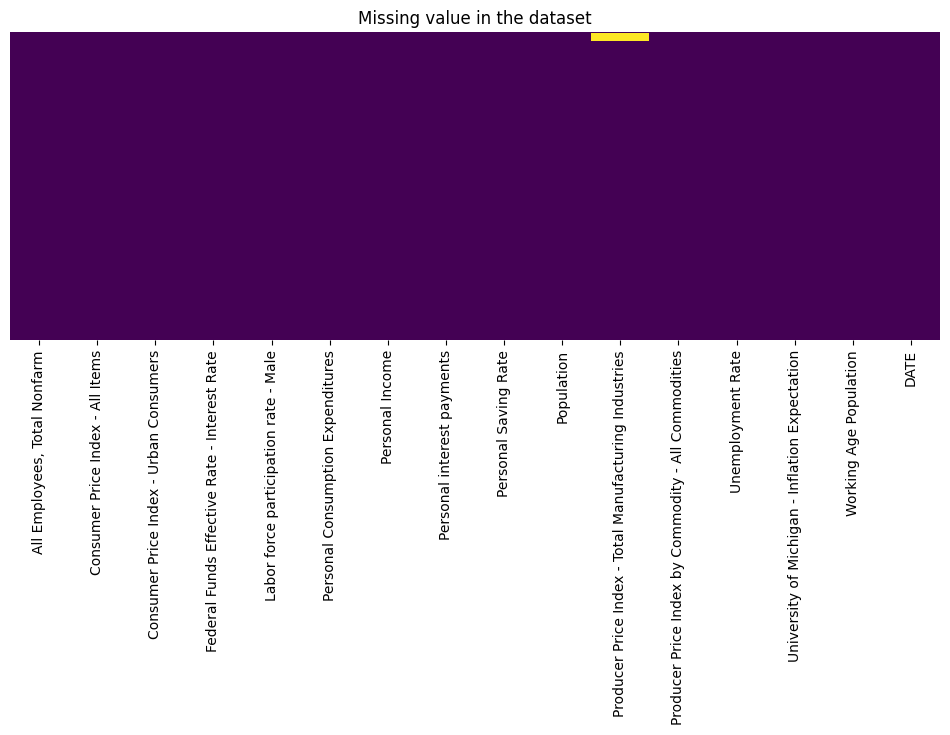

In [71]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

## <a id='toc1_2_'></a>[cleaning up dateset](#toc0_)

#### Drop Rows which value NaN in data
Nan Dates are not useful because it's doesn't represent anything

In [72]:
#remove data i fperiodDataUTC is null
data = data.dropna(subset=['DATE']);

#### Fill NaN
Fill NaN with previous values if there are any. In case there are not any previous values, we will replace it with zero. </br>

<i>Note: We will not replace non-previous values with avaerage beacause most of the values are in trend line (i.e. incremental) and average doesn't represent the correct value at any given point</i>

In [73]:
#first fill previous value if there is not a previous value fill 0
for column in data.columns:
    data[column].fillna(method="ffill", inplace=True)
    data[column].fillna(0, inplace=True)
    
data.head(10)

,"All Employees, Total Nonfarm",Consumer Price Index - All Items,Consumer Price Index - Urban Consumers,Federal Funds Effective Rate - Interest Rate,Labor force participation rate - Male,Personal Consumption Expenditures,Personal Income,Personal interest payments,Personal Saving Rate,Population,Producer Price Index - Total Manufacturing Industries,Producer Price Index by Commodity - All Commodities,Unemployment Rate,University of Michigan - Inflation Expectation,Working Age Population,DATE
0,96107,44.427193,105.5,8.38,94.0,2582.6,3420.7,80.6,11.2,237392.0,100.0,103.5,7.3,3.3,1.507188e+08,1984-12-01 00:00:00+00:00
1,96372,44.511575,105.7,8.35,94.0,2618.8,3433.9,84.1,10.3,237535.0,100.0,103.4,7.3,2.9,1.505133e+08,1985-01-01 00:00:00+00:00
2,96503,44.722530,106.3,8.50,93.9,2640.8,3452.3,86.5,9.1,237667.0,100.0,103.3,7.2,3.1,1.506300e+08,1985-02-01 00:00:00+00:00
3,96842,44.891295,106.8,8.58,93.9,2648.5,3480.0,87.9,8.7,237816.0,100.0,103.1,7.2,3.0,1.507852e+08,1985-03-01 00:00:00+00:00
4,97038,45.102250,107.0,8.27,94.1,2659.5,3478.1,88.9,9.9,237987.0,100.0,103.3,7.3,3.3,1.509430e+08,1985-04-01 00:00:00+00:00
5,97312,45.271014,107.2,7.97,93.8,2696.4,3493.4,89.4,11.1,238172.0,100.0,103.5,7.2,3.2,1.510182e+08,1985-05-01 00:00:00+00:00
6,97459,45.397588,107.5,7.53,93.8,2689.4,3514.9,90.3,9.6,238368.0,100.0,103.3,7.4,3.4,1.512164e+08,1985-06-01 00:00:00+00:00
7,97648,45.481970,107.7,7.88,93.9,2715.7,3528.4,90.8,9.1,238573.0,100.0,103.2,7.4,2.8,1.512276e+08,1985-07-01 00:00:00+00:00
8,97840,45.566352,107.9,7.90,93.9,2752.1,3539.5,91.9,8.2,238789.0,100.0,102.7,7.1,2.8,1.513363e+08,1985-08-01 00:00:00+00:00
9,98045,45.692925,108.1,7.92,94.1,2794.7,3561.4,92.8,7.3,239006.0,100.0,102.1,7.1,2.9,1.514698e+08,1985-09-01 00:00:00+00:00


### <a id='toc1_2_1_'></a>[Sort and inverse DataFrame](#toc0_)

Order of ```date``` is most important expect of data, so it's will be sorted by date in decremental order to create modal of old data first.

In [74]:
# Reverse the order of the DataFrame to make it descending
data = data.iloc[::-1]

# Sort the DataFrame by 'DATE' in ascending order
data.sort_values(by='DATE', inplace=True)

# Reset the index if needed
data.reset_index(drop=True, inplace=True)

data.head(10)

,"All Employees, Total Nonfarm",Consumer Price Index - All Items,Consumer Price Index - Urban Consumers,Federal Funds Effective Rate - Interest Rate,Labor force participation rate - Male,Personal Consumption Expenditures,Personal Income,Personal interest payments,Personal Saving Rate,Population,Producer Price Index - Total Manufacturing Industries,Producer Price Index by Commodity - All Commodities,Unemployment Rate,University of Michigan - Inflation Expectation,Working Age Population,DATE
0,96107,44.427193,105.5,8.38,94.0,2582.6,3420.7,80.6,11.2,237392.0,100.0,103.5,7.3,3.3,1.507188e+08,1984-12-01 00:00:00+00:00
1,96372,44.511575,105.7,8.35,94.0,2618.8,3433.9,84.1,10.3,237535.0,100.0,103.4,7.3,2.9,1.505133e+08,1985-01-01 00:00:00+00:00
2,96503,44.722530,106.3,8.50,93.9,2640.8,3452.3,86.5,9.1,237667.0,100.0,103.3,7.2,3.1,1.506300e+08,1985-02-01 00:00:00+00:00
3,96842,44.891295,106.8,8.58,93.9,2648.5,3480.0,87.9,8.7,237816.0,100.0,103.1,7.2,3.0,1.507852e+08,1985-03-01 00:00:00+00:00
4,97038,45.102250,107.0,8.27,94.1,2659.5,3478.1,88.9,9.9,237987.0,100.0,103.3,7.3,3.3,1.509430e+08,1985-04-01 00:00:00+00:00
5,97312,45.271014,107.2,7.97,93.8,2696.4,3493.4,89.4,11.1,238172.0,100.0,103.5,7.2,3.2,1.510182e+08,1985-05-01 00:00:00+00:00
6,97459,45.397588,107.5,7.53,93.8,2689.4,3514.9,90.3,9.6,238368.0,100.0,103.3,7.4,3.4,1.512164e+08,1985-06-01 00:00:00+00:00
7,97648,45.481970,107.7,7.88,93.9,2715.7,3528.4,90.8,9.1,238573.0,100.0,103.2,7.4,2.8,1.512276e+08,1985-07-01 00:00:00+00:00
8,97840,45.566352,107.9,7.90,93.9,2752.1,3539.5,91.9,8.2,238789.0,100.0,102.7,7.1,2.8,1.513363e+08,1985-08-01 00:00:00+00:00
9,98045,45.692925,108.1,7.92,94.1,2794.7,3561.4,92.8,7.3,239006.0,100.0,102.1,7.1,2.9,1.514698e+08,1985-09-01 00:00:00+00:00


### <a id='toc1_2_2_'></a>[Plot values](#toc0_)

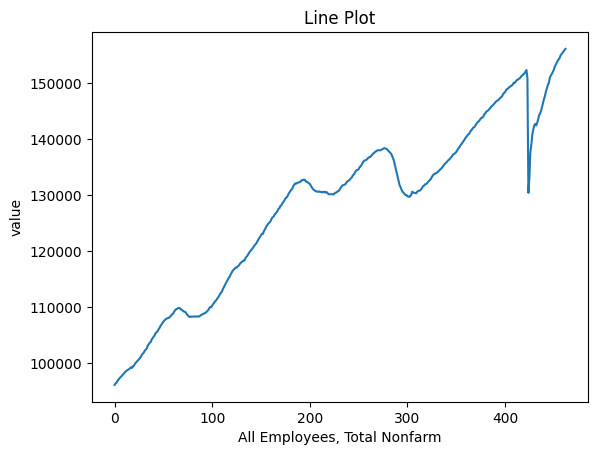

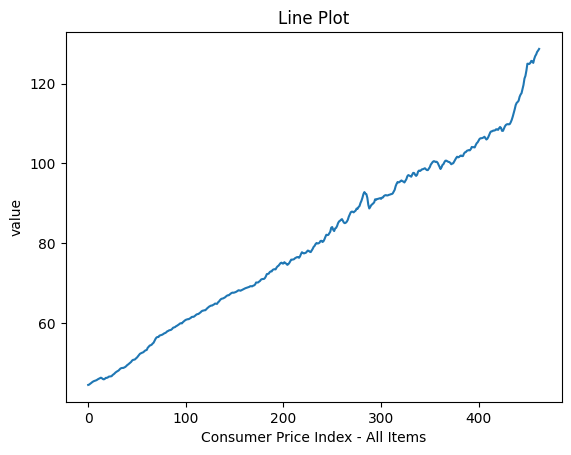

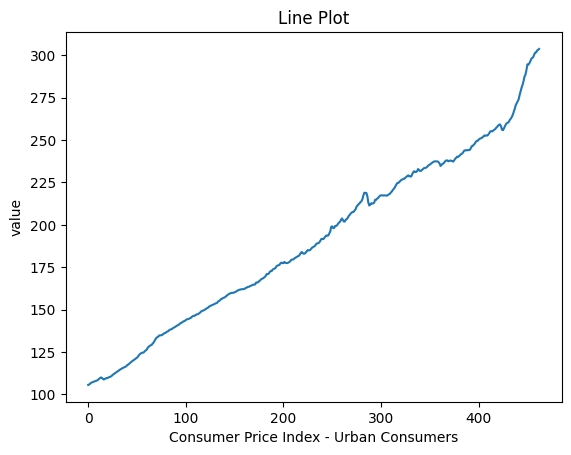

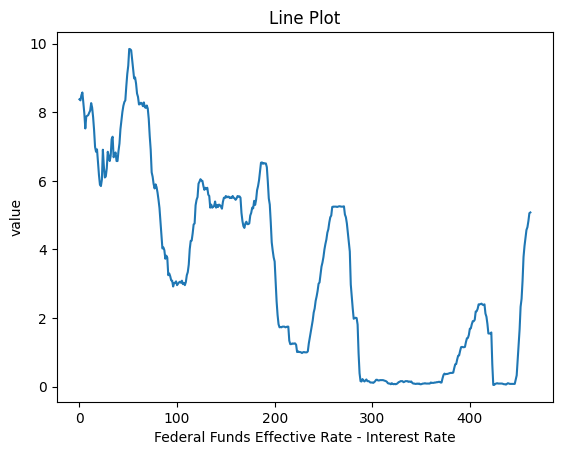

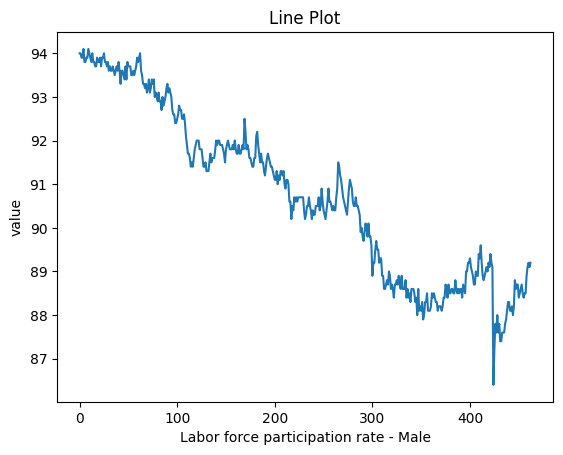

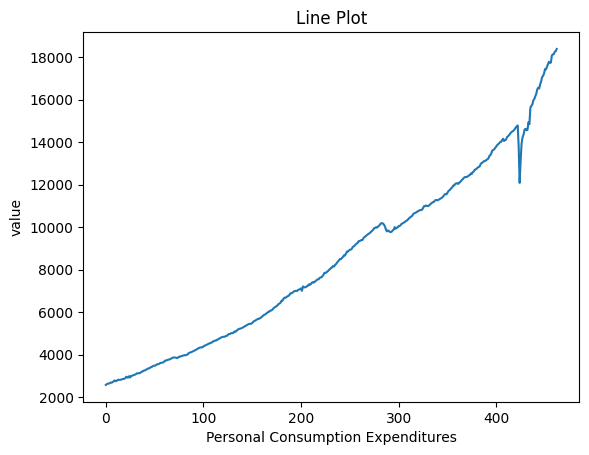

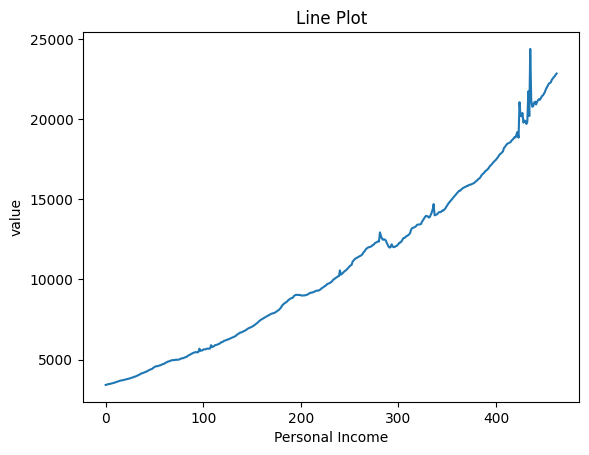

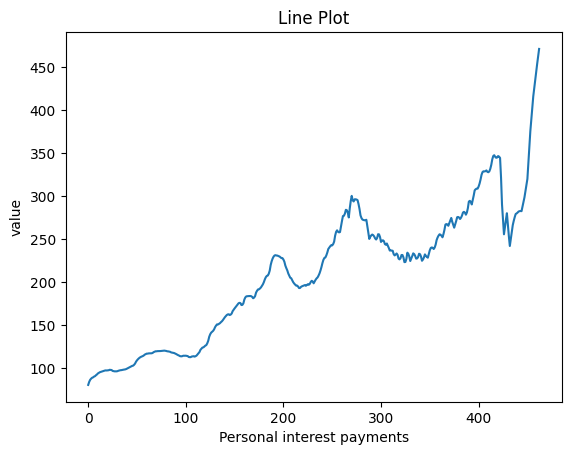

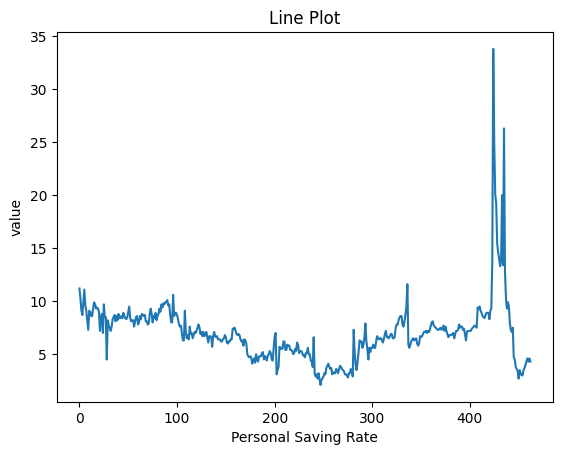

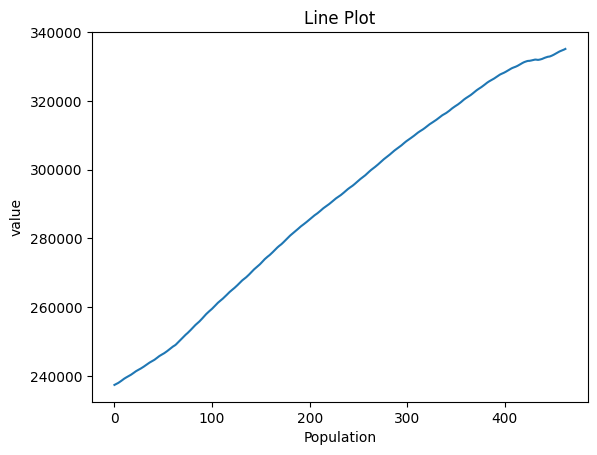

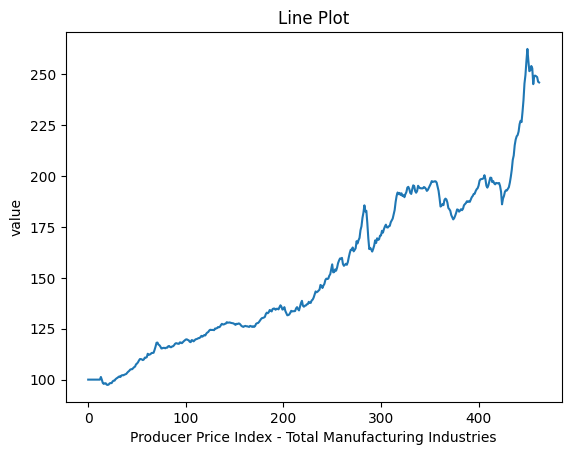

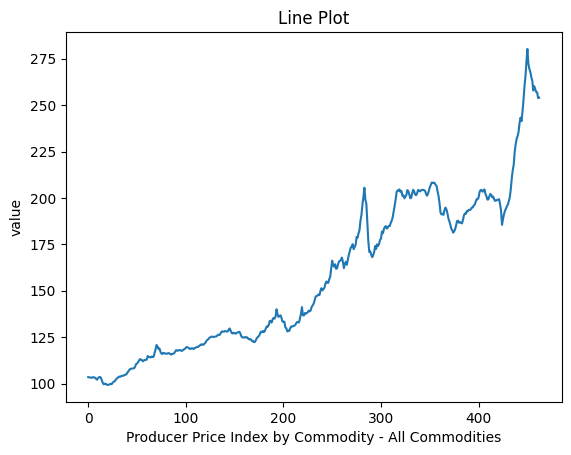

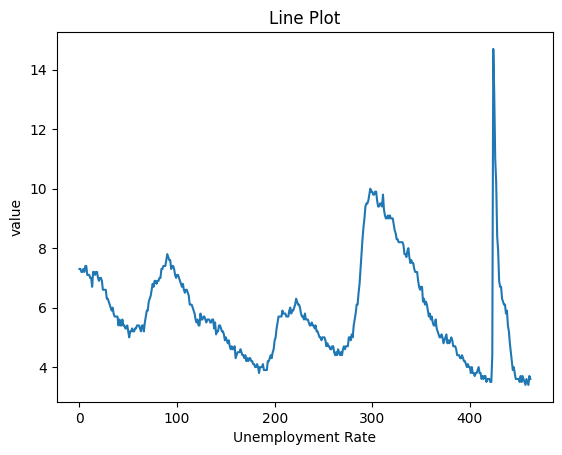

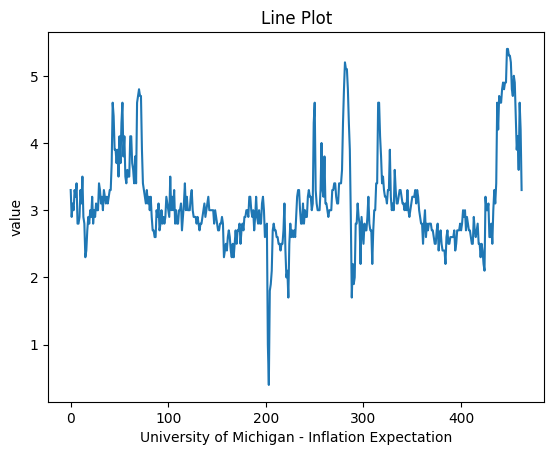

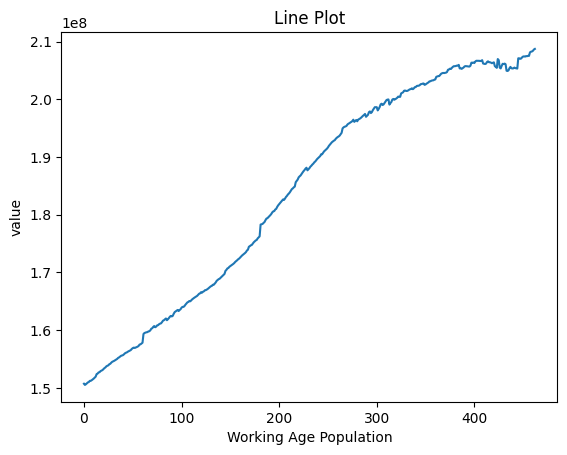

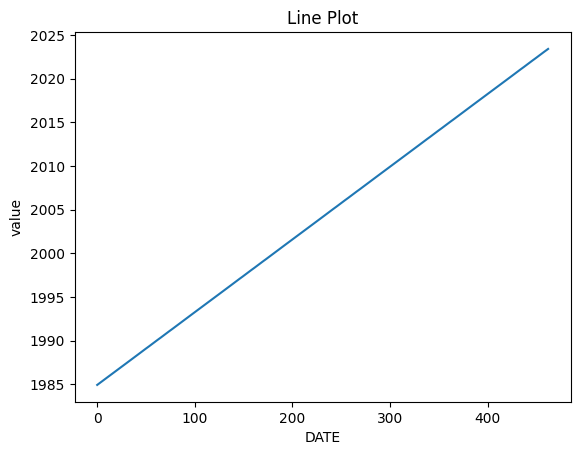

In [75]:

for column in data.columns:
    plt.plot(data.index, data[column], label=column)

    # plt.legend()
    # plt.tight_layout()  # Optional: Adjust the layout for better spacing
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.xlabel(column)
    plt.ylabel('value')
    plt.title('Line Plot')
    plt.show()

In [76]:
# from sklearn.ensemble import IsolationForest


# for column in data.columns:

#     plt.plot(data.index, data[column], c='red', label=column)

#     # Fit the IsolationForest model to detect outliers
#     outlier_detector = IsolationForest(contamination='auto', random_state=42)
#     outlier_detector.fit(data[[column]])

#     # Predict the outliers
#     data['is_outlier'] = outlier_detector.predict(data[[column]])

#     # Update the outlier values with a desired value (e.g., median)
#     median_value = data.loc[data['is_outlier'] == -1, column].median()
#     data.loc[data['is_outlier'] == -1, column] = median_value

#     # Remove the 'is_outlier' column since it's no longer needed
#     data.drop(columns='is_outlier', inplace=True)

#     plt.plot(data.index, data[column], c='blue', label=column+" updated")
#     plt.xlabel('Index')
#     plt.legend()
#     plt.ylabel(column)
#     plt.title(column + ' with Outliers vs Updated')

#     plt.tight_layout()
#     plt.show()


### <a id='toc1_2_3_'></a>[Drop index/periodDateUTC value](#toc0_)

there is no use of date anymore, order is preserved by index and it will create problem for observation since ```DATE``` is non-numeric value

In [78]:
data = data.drop('DATE', axis=1)

### <a id='toc1_2_4_'></a>[check simple correlation between features and Interest Rate](#toc0_)

The correlation coefficient ranges from -1 to 1:</br></br>

If the correlation coefficient is close to 1, it indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. </br>
If the correlation coefficient is close to -1, it indicates a strong negative correlation, meaning that as one variable increases, the other tends to decrease. </br>
If the correlation coefficient is close to 0, it indicates a weak or no linear correlation between the two variables.</br>

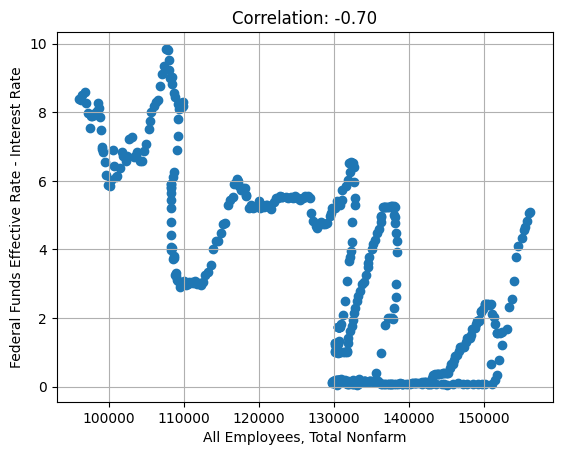

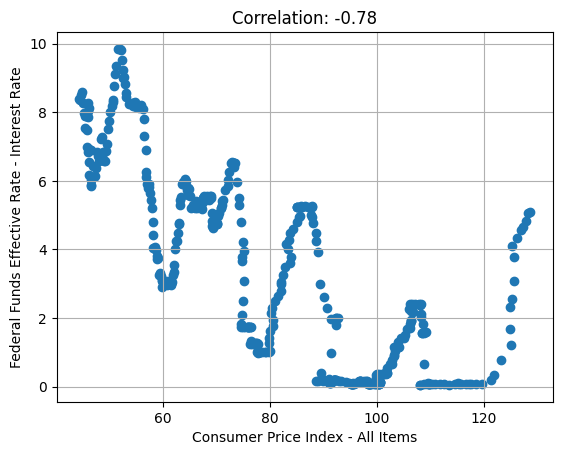

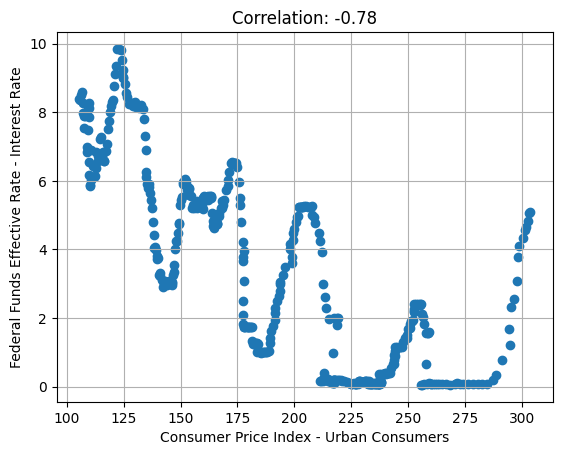

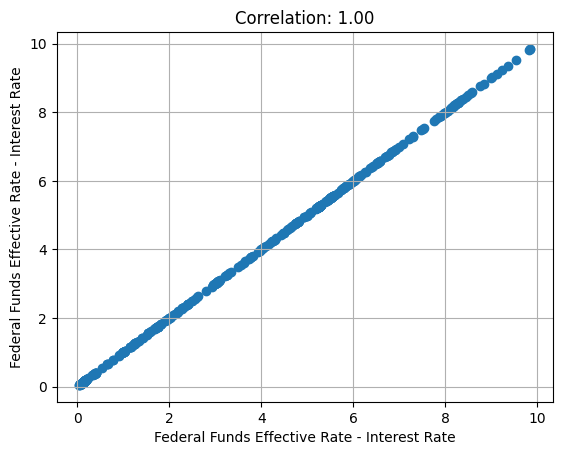

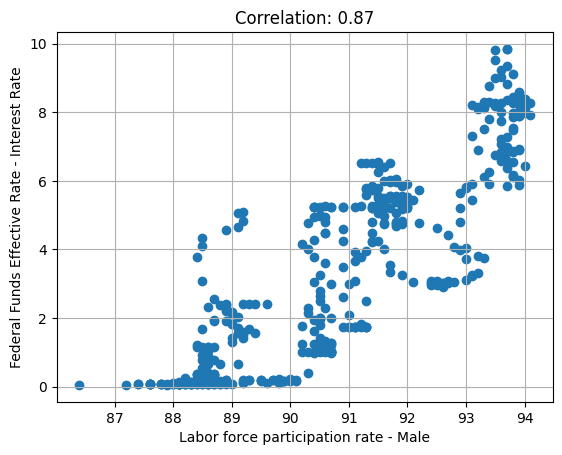

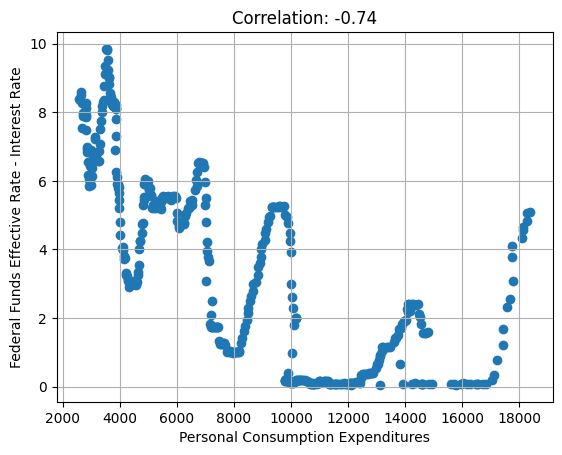

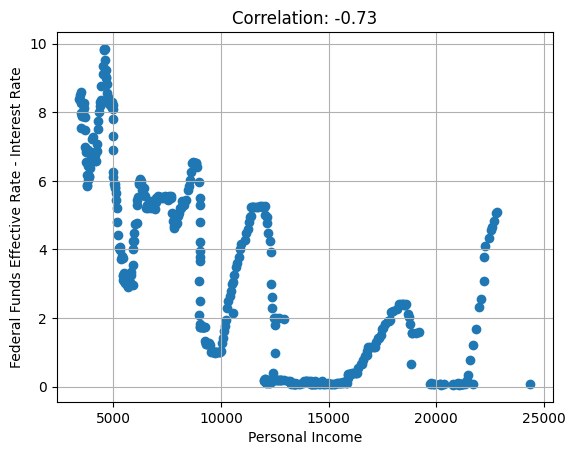

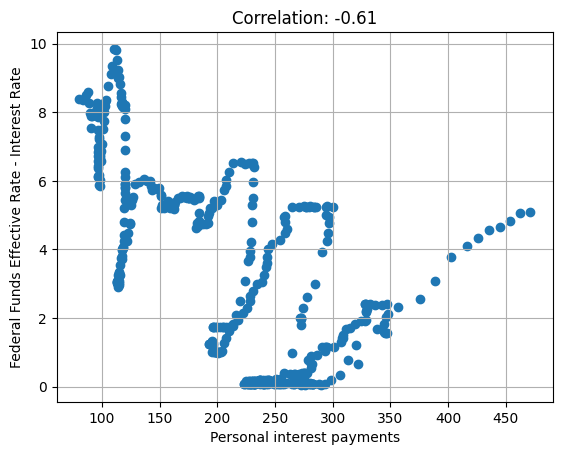

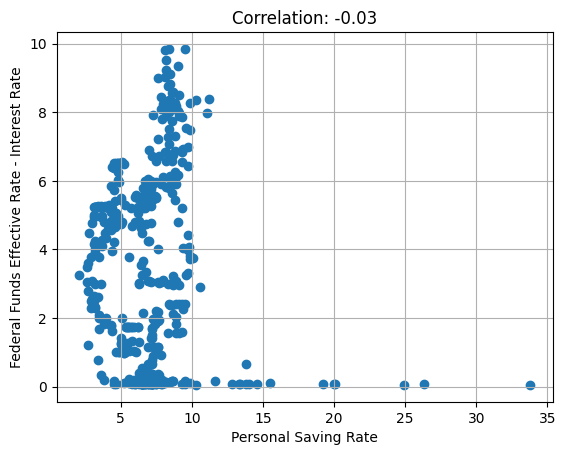

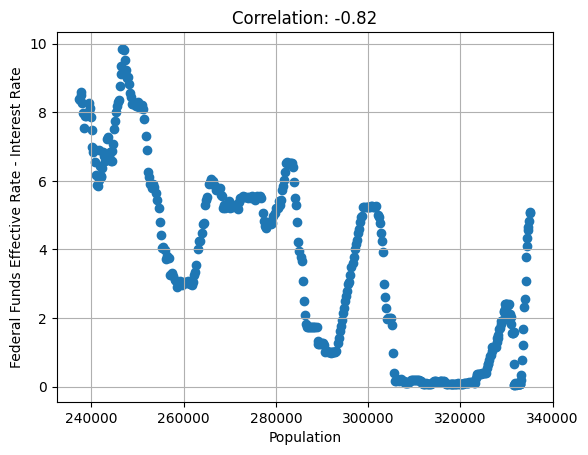

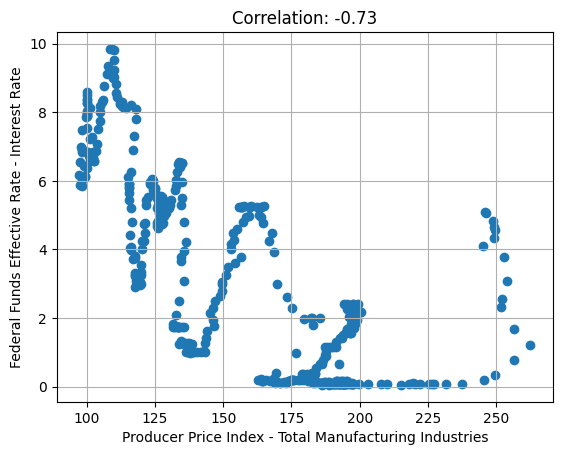

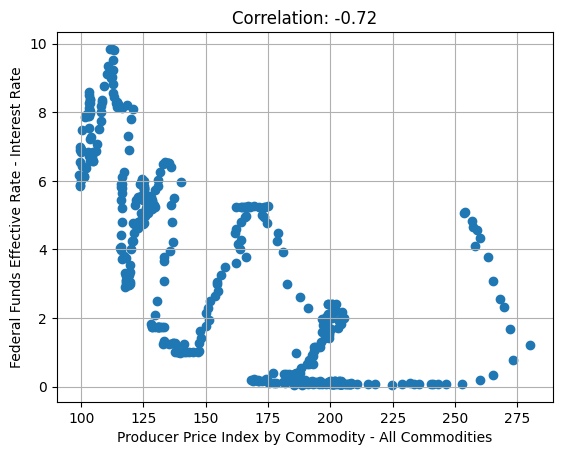

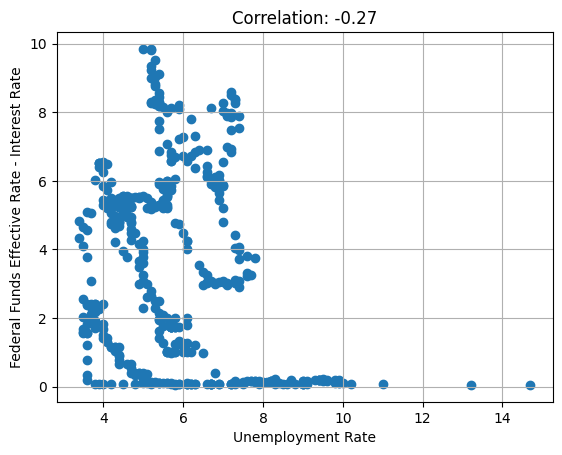

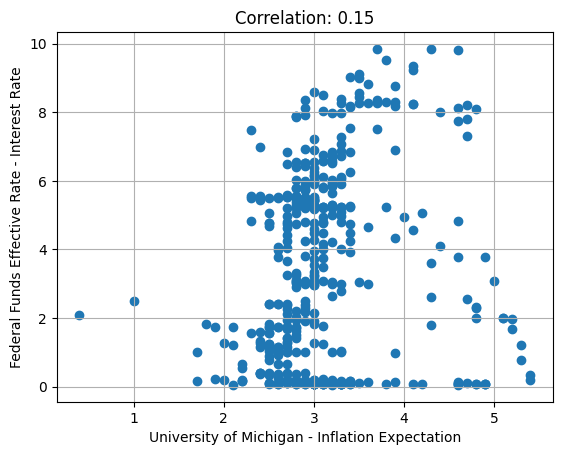

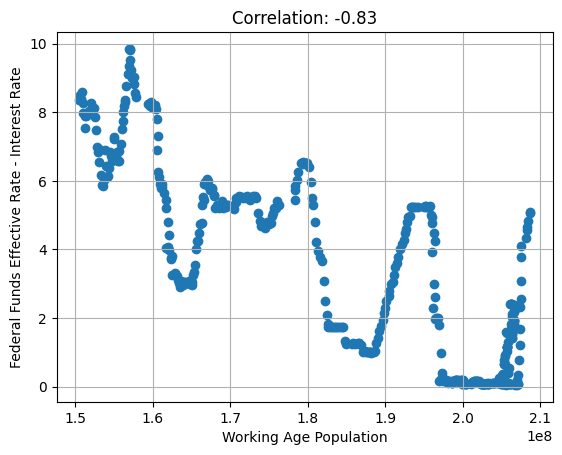

In [79]:
for column in data.columns:
    correlation = data[column].corr(data['Federal Funds Effective Rate - Interest Rate'])

    # Plot a scatter plot to visualize the correlation
    plt.scatter(data[column], data['Federal Funds Effective Rate - Interest Rate'])
    plt.xlabel(column)
    plt.ylabel('Federal Funds Effective Rate - Interest Rate')
    plt.title(f'Correlation: {correlation:.2f}')
    plt.grid(True)
    plt.show()

### <a id='toc1_2_5_'></a>[check for correlation between all features](#toc0_)

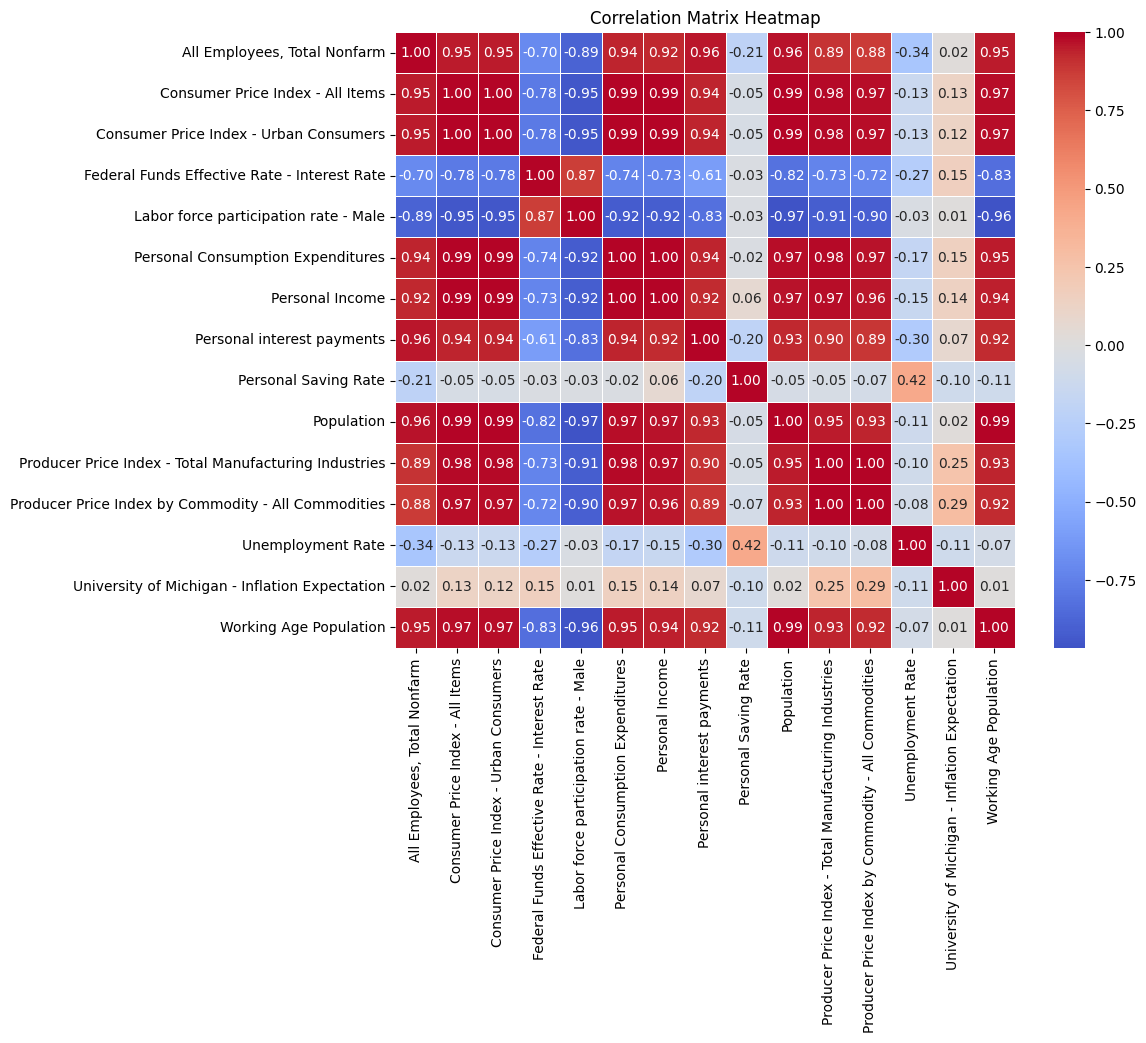

In [80]:
numeric_df = data.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### <a id='toc1_2_5_1_'></a>[find most correlted feature](#toc0_)

In [86]:
def getMulticollinearFeatures(df, threshold): 
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()

    # Select highly correlated features
    multicollinear_features = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) >= threshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                multicollinear_features.append(colname_i)
                multicollinear_features.append(colname_j)

    return multicollinear_features;

In [87]:
def plotMulticollinearFeatures(features):
    multicollinear_features = np.array(features)
    string_counts = Counter(multicollinear_features)

    sorted_string_counts = dict(sorted(string_counts.items(), key=lambda x: x[1], reverse=False))
    plt.figure(figsize=(8, 6))
    plt.bar(sorted_string_counts.keys(), sorted_string_counts.values())
    plt.xlabel('multicollinear features')
    plt.ylabel('Frequency')
    plt.title('Distribution of Strings by Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### <a id='toc1_2_5_2_'></a>[Variance Inflation Factor (VIF)](#toc0_)

<p>VIF is a metric that quantifies the extent of multicollinearity in a feature by measuring how much the variance of an estimated regression coefficient increases when that feature is added to the model. </br>
High VIF values (>5 or 10) suggest the presence of multicollinearity.</P>

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVIF(df): 
    # Calculate VIF for each feature
    vif = pd.DataFrame()
    numeric_df = df.select_dtypes(include='number')
    vif['Feature'] = numeric_df.columns
    vif['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

    print(vif)

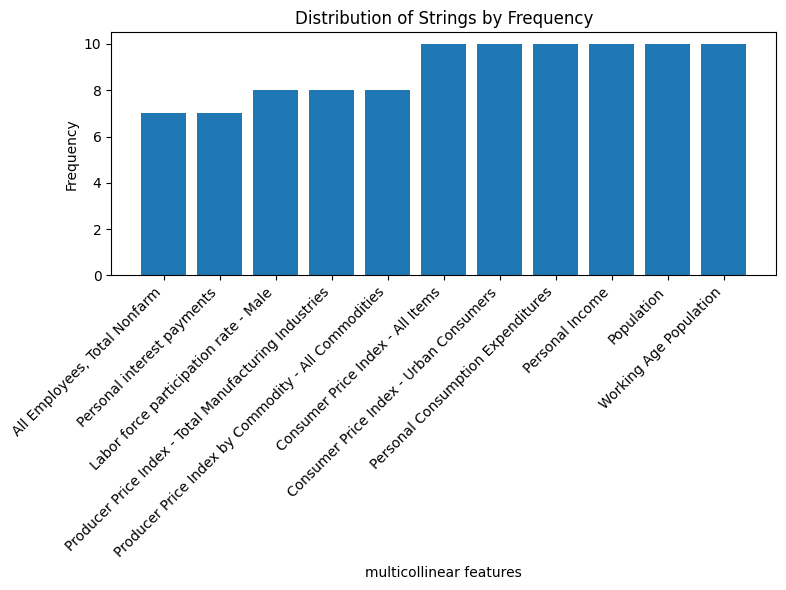

In [93]:
features = getMulticollinearFeatures(data, 0.9)
plotMulticollinearFeatures(features)


### <a id='toc1_2_6_'></a>[Feature Selection](#toc0_)

#### <a id='toc1_2_6_1_'></a>[Combine Feature which are highly correlated with each other from above figure](#toc0_)

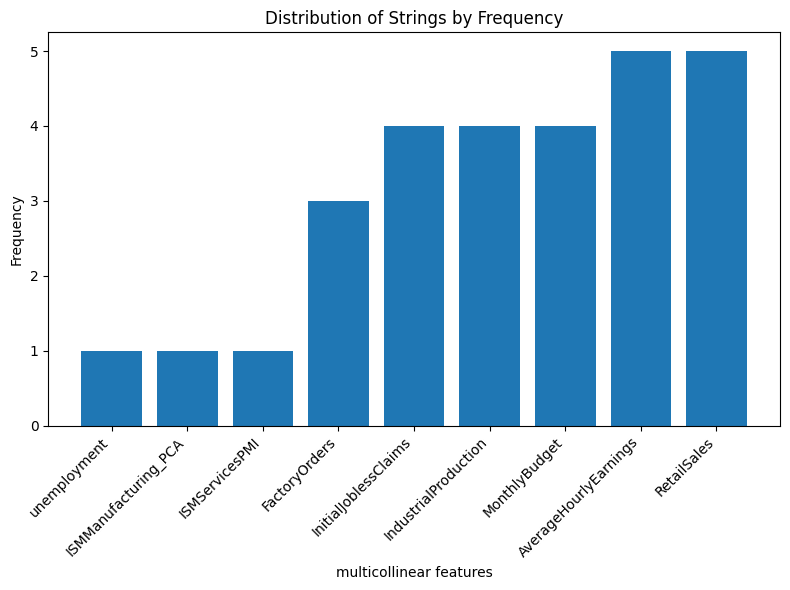

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data (mandatory for PCA)
scaler = StandardScaler()

ManufacturingCols = ['ISMManufacturing', 'ManufacturingNewOrdersIndex']
#'ISMManufacturing', 'ManufacturingNewOrdersIndex', 'ManufacturingPricesPaid', 'ManufacturingEmploymentIndex',
X_std = scaler.fit_transform(final_df[ManufacturingCols])

# print(X_std)

# Apply PCA to reduce the dimensionality to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Add the reduced component as a new column in the DataFrame
final_df['ISMManufacturing_PCA'] = X_pca

cleaned_df = final_df.drop(ManufacturingCols,axis=1) # Independet variable

features = getMulticollinearFeatures(cleaned_df, 0.8)
plotMulticollinearFeatures(features)

In [94]:
getVIF(data);

                                              Feature            VIF
0                        All Employees, Total Nonfarm   27052.421367
1                    Consumer Price Index - All Items  125498.331869
2              Consumer Price Index - Urban Consumers  119417.094120
3        Federal Funds Effective Rate - Interest Rate      32.878627
4               Labor force participation rate - Male    4942.188123
5                   Personal Consumption Expenditures    8092.940951
6                                     Personal Income    6918.540018
7                          Personal interest payments     418.736547
8                                Personal Saving Rate     121.920401
9                                          Population   72130.465004
10  Producer Price Index - Total Manufacturing Ind...   18931.564161
11  Producer Price Index by Commodity - All Commod...   11590.660579
12                                  Unemployment Rate     251.168527
13     University of Michigan - In

In [95]:
print(data.describe())

       All Employees, Total Nonfarm  Consumer Price Index - All Items  \
count                    463.000000                        463.000000   
mean                  128164.308855                         80.502319   
std                    15414.942467                         21.563054   
min                    96107.000000                         44.427193   
25%                   114753.000000                         62.738116   
50%                   131120.000000                         79.066059   
75%                   138057.000000                         98.580060   
max                   156155.000000                        128.728741   

       Consumer Price Index - Urban Consumers  \
count                              463.000000   
mean                               190.803654   
std                                 51.096474   
min                                105.500000   
25%                                148.700000   
50%                                187.100000   

### <a id='toc1_2_7_'></a>[Spliting data](#toc0_)

In [96]:
from sklearn.model_selection import train_test_split
X = data.drop('Federal Funds Effective Rate - Interest Rate',axis=1) # Independet variable
y = data['Federal Funds Effective Rate - Interest Rate'] # dependent variable

# # Initialize the SMOTE object
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Apply SMOTE to create synthetic samples for the minority class
# X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [97]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [98]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

### <a id='toc1_2_8_'></a>[Linear Regression](#toc0_)

In [99]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.656413e+01,7.656413e+01
1,theta_1,"All Employees, Total Nonfarm",-7.425287e-05,-7.425287e-05
2,theta_2,Consumer Price Index - All Items,-4.013180e-01,-4.013180e-01
3,theta_3,Consumer Price Index - Urban Consumers,4.338417e-02,4.338417e-02
4,theta_4,Labor force participation rate - Male,-4.964944e-01,-4.964944e-01
5,theta_5,Personal Consumption Expenditures,-1.009149e-03,-1.009149e-03
6,theta_6,Personal Income,6.550609e-04,6.550609e-04
7,theta_7,Personal interest payments,5.070033e-02,5.070033e-02
8,theta_8,Personal Saving Rate,4.633360e-02,4.633360e-02
9,theta_9,Population,4.133313e-05,4.133313e-05


In [100]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.553040409941438
R square obtain for normal equation method is : 0.9285187527196033


In [101]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.5530404097471014
R square obtain for scikit learn library is : 0.9285187527447216


C:\Users\ACER\AppData\Local\Temp\ipykernel_37568\2482664790.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


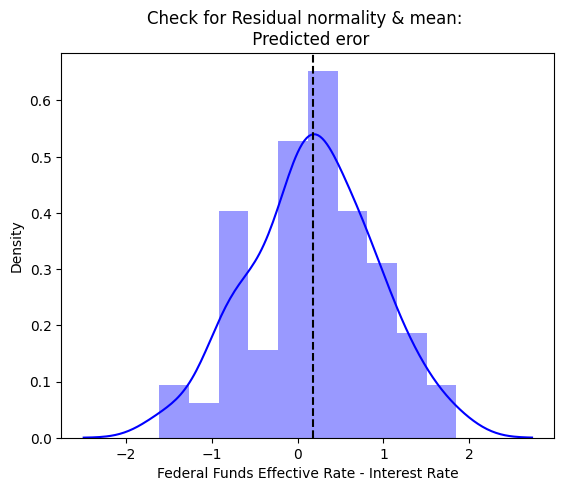

In [102]:
# Check for Linearity
f = plt.figure(figsize=(14,5))

# sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
# sns.scatterplot(x=y_test,y=y_pred_sk, color='r')
# sns.scatterplot(data = ax, color='b')


# ax.set_title('Check for Linearity:\n Unemployed Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Predicted eror');

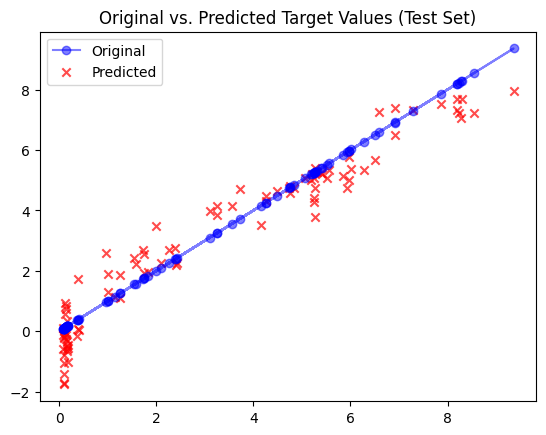

In [104]:
# Plot the original vs. predicted values for the test set
plt.plot(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, y_pred_sk, c='red', label='Predicted', marker='x', alpha=0.7)
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()

### <a id='toc1_2_9_'></a>[Multivariate Normality and Homoscedasticity](#toc0_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


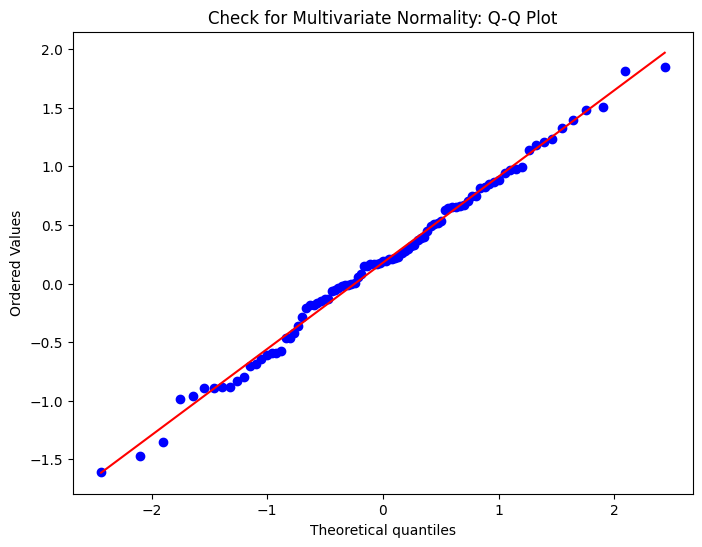

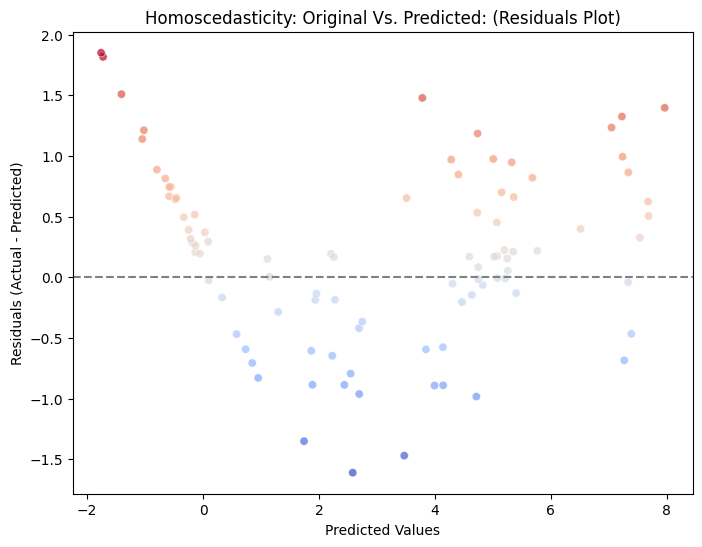

In [110]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
plt.figure(figsize=(8, 6))
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=plt)
plt.title('Check for Multivariate Normality: Q-Q Plot')
plt.legend().set_visible(False)  # Hide the legend
plt.show()

# Calculate the residuals
residuals = y_test - y_pred_sk

# Create the plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(y=residuals, x=y_pred_sk, hue=residuals, palette='coolwarm', alpha=0.7)
plt.axhline(0, color='gray', linestyle='dashed')  # Add a dashed line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Homoscedasticity: Original Vs. Predicted: (Residuals Plot)')
plt.legend().set_visible(False)  # Hide the legend
plt.show()

In [111]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

13.989683146248643

### <a id='toc1_2_10_'></a>[r2 score and mean squared error](#toc0_)

In [112]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have a separate test dataset X_test and y_test

# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)

residuals = abs((y_test - y_pred)/ y_test)

residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print("Mean of Residuals / Accouracy :", residual_mean)

R-squared: 0.9285187527447216
Mean Squared Error (MSE): 0.5530404097471014
Mean of Residuals / Accouracy : 1.8516764770365512


### <a id='toc1_2_11_'></a>[Linear Regression - Univeriant](#toc0_)

In [114]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data (mandatory for PCA)
scaler = StandardScaler()

unemployment = data['Federal Funds Effective Rate - Interest Rate']
uv_df = data.drop('Federal Funds Effective Rate - Interest Rate',axis=1) # Independet variable
df_cols = uv_df.columns

X_std = scaler.fit_transform(data[df_cols])

# print(X_std)

# Apply PCA to reduce the dimensionality to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Add the reduced component as a new column in the DataFrame
univariant_df = pd.DataFrame()
univariant_df['target'] = unemployment
univariant_df['combined_feature'] = X_pca

# Step 5: Perform univariate linear regression to predict the 'target'
X = univariant_df['combined_feature'].values.reshape(-1, 1)
y = univariant_df['target'].values

In [115]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Perform univariate linear regression to predict the 'target'
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 7: Calculate the cost function (mean squared error) for the model's predictions on the test set.
predictions = regressor.predict(X_test)
cost_function = mean_squared_error(y_test, predictions)

print("Cost function (Mean Squared Error) on the test set:", cost_function)

Cost function (Mean Squared Error) on the test set: 3.524394099149392


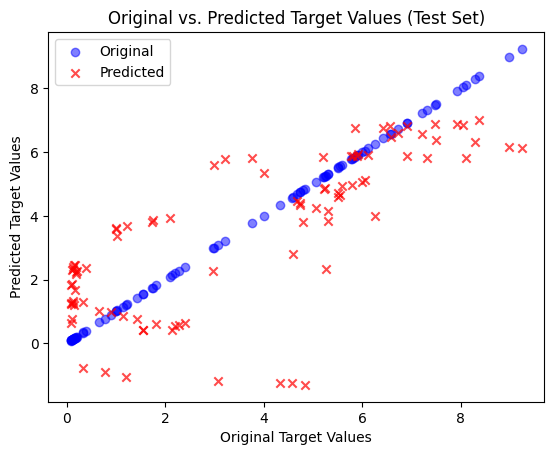

Mean of Residuals / Accouracy : 302.0643818442641
Standard Deviation of Residuals: 5.296025289358625


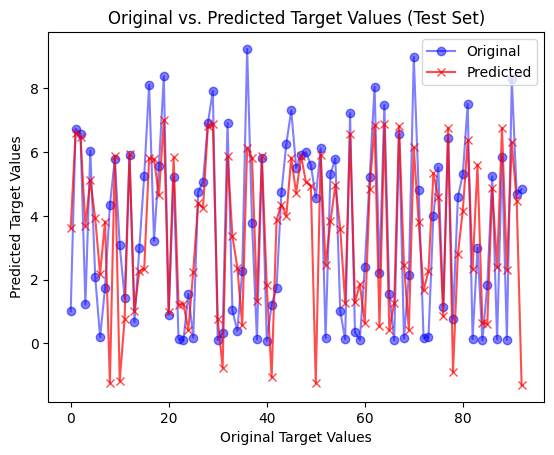

In [116]:
# Plot the original vs. predicted values for the test set
plt.scatter(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, predictions, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()


residuals = abs((y_test - predictions)/ y_test)

residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print("Mean of Residuals / Accouracy :", residual_mean*100)
print("Standard Deviation of Residuals:", residual_std)

# Plot the original vs. predicted values for the test set
plt.plot(y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.plot(predictions, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()


### <a id='toc1_2_12_'></a>[SVR (Support Vector Regression)](#toc0_)

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [118]:
# Standardize the features (optional but can improve model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R2): 0.4969176932085674
Mean Squared Error (MSE): 3.9037837194549985


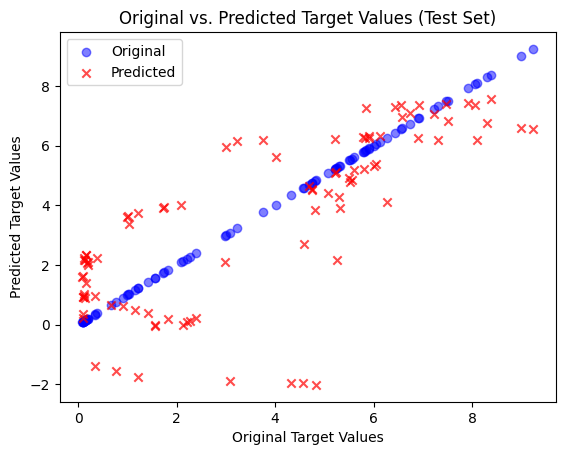

In [119]:
# Plot the original vs. predicted values for the test set
plt.scatter(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, y_pred, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()

### <a id='toc1_2_13_'></a>[Random Forest Regression:](#toc0_)

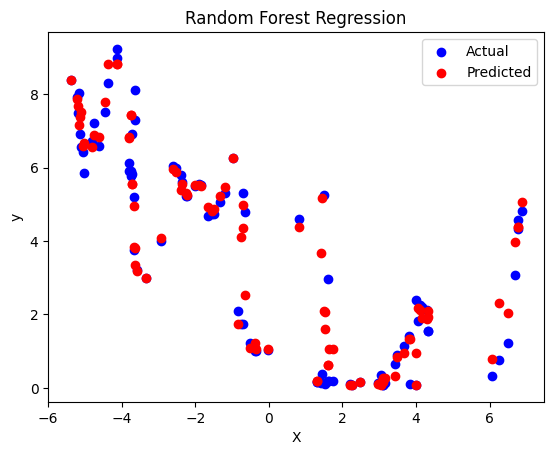

In [120]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
# We'll use 10 decision trees in the ensemble
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

Mean Squared Error: 1.5218799139784949
Root Squared Error: 0.8038746731873925
Mean Absolute Error: 0.6871827956989248
Mean of Residuals / Accouracy : -35.71627895962292


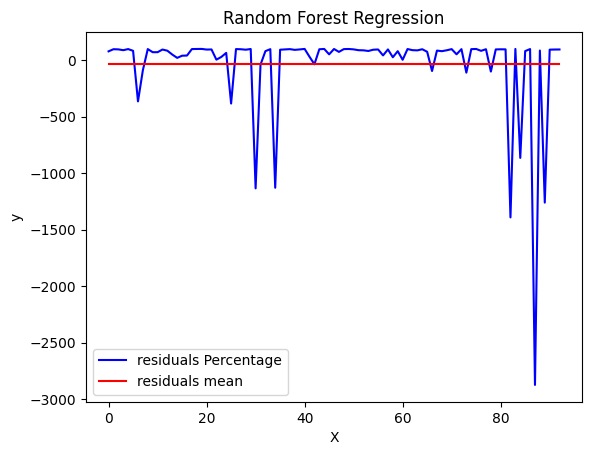

In [121]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)
print("Root Squared Error:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


accuracy = pd.DataFrame();
accuracy['test'] = y_test
accuracy['prediction'] = y_pred

residuals = 100 - abs((y_test - y_pred) * 100/ y_test)
accuracy['residuals_pct'] = residuals


residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

accuracy['residuals_mean'] = residual_mean
print("Mean of Residuals / Accouracy :", residual_mean)

# Plot the results
plt.plot(accuracy.index, accuracy['residuals_pct'], color='blue', label='residuals Percentage')
plt.plot(accuracy.index, accuracy['residuals_mean'], color='red', label='residuals mean')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest Regression')
plt.legend()
plt.show()


### <a id='toc1_2_14_'></a>[Confusion Matrix](#toc0_)